#Simple SVM Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [ ]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
model = SVC()
X_train , X_test , Y_train , Y_test = train_test_split(X,Y)

In [ ]:
model.fit(X_train, Y_train)

SVC()

In [ ]:
predicted = model.predict(X_test)
expected = Y_test
metrics.accuracy_score(expected, predicted)

0.9473684210526315

#Various Kernel Types

In [ ]:
from sklearn import svm

In [ ]:
X = iris.data[:,:2]
Y = iris.target
# SVM Regularization parameter
C = 1

Let's break down each line of code in detail:

1. `svc = svm.SVC(kernel = "linear", C=C).fit(X,Y)`
   - This line creates an SVM classifier with a linear kernel. The linear kernel means that the decision boundary between classes will be a straight line in the input space.
   - `C` is a parameter that controls the trade-off between having a smooth decision boundary and correctly classifying training points. Higher values of `C` allow for more complex decision boundaries that correctly classify more training points, potentially leading to overfitting.
   - `X` is the feature matrix containing the input data, and `Y` is the target vector containing the class labels.
   - `fit(X, Y)` trains the SVM classifier on the input data `X` and the corresponding class labels `Y`.

2. `rbf_svc = svm.SVC(kernel = "rbf", gamma = 0.7 , C=C).fit(X,Y)`
   - This line creates another SVM classifier, but this time with a radial basis function (RBF) kernel. The RBF kernel is a popular choice as it can capture complex decision boundaries by mapping the input data to a high-dimensional space.
   - `gamma` is a parameter specific to the RBF kernel. It defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'.
   - `fit(X, Y)` trains the RBF SVM classifier on the input data `X` and the corresponding class labels `Y`.

3. `poly_svc  = svm.SVC(kernel = "poly" , degree =3, C=C).fit(X,Y)`
   - This line creates an SVM classifier with a polynomial kernel. The polynomial kernel is useful for capturing non-linear relationships between features.
   - `degree` is a parameter specific to the polynomial kernel. It controls the degree of the polynomial used to compute the kernel function.
   - `fit(X, Y)` trains the polynomial SVM classifier on the input data `X` and the corresponding class labels `Y`.

4. `lin_svc = svm.LinearSVC(C=C).fit(X,Y)`
   - This line creates a linear SVM classifier using the `LinearSVC` class. Unlike `SVC(kernel="linear")`, `LinearSVC` uses a different optimization algorithm that scales better to large datasets.
   - `C` is again the regularization parameter, controlling the trade-off between maximizing the margin and minimizing the classification error.
   - `fit(X, Y)` trains the linear SVM classifier on the input data `X` and the corresponding class labels `Y`.

Overall, these lines of code demonstrate how to create and train different SVM classifiers with different kernel functions (linear, RBF, polynomial) and optimization algorithms (standard SVM with `SVC` and linear SVM with `LinearSVC`) using the scikit-learn library in Python.

In [ ]:
svc = svm.SVC(kernel = "linear", C=C).fit(X,Y)
rbf_svc = svm.SVC(kernel = "rbf", gamma = 0.7 , C=C).fit(X,Y)
poly_svc  = svm.SVC(kernel = "poly" , degree =3, C=C).fit(X,Y)
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Sure, let's delve deeper into the concept of the radial basis function (RBF) kernel.

### Radial Basis Function (RBF) Kernel:

1. **Intuition:**
   - The RBF kernel is a popular choice in SVM because of its ability to capture complex decision boundaries.
   - It operates by mapping data points into a higher-dimensional space where they become linearly separable.

2. **Mathematical Representation:**
The RBF kernel function for two input data points
𝑥
𝑖
x
i
​
  and
𝑥
𝑗
x
j
​
  is defined as:
𝐾
(
𝑥
𝑖
,
𝑥
𝑗
)
=
exp
⁡
(
−
𝛾
∥
𝑥
𝑖
−
𝑥
𝑗
∥
2
)
K(x
i
​
 ,x
j
​
 )=exp(−γ∥x
i
​
 −x
j
​
 ∥
2
 )
where
𝛾
γ is a hyperparameter called the 'gamma' parameter.
∥
𝑥
𝑖
−
𝑥
𝑗
∥
2
∥x
i
​
 −x
j
​
 ∥
2
  denotes the squared Euclidean distance between the two data points in the original feature space.

3. **Effect of Gamma (γ):**
   - The gamma parameter determines the influence of a single training example's distance on the decision boundary.
   - A low gamma value means that the influence of each training example is far-reaching, leading to a smoother decision boundary.
   - Conversely, a high gamma value means that the influence is limited to nearby data points, potentially resulting in a more complex and tighter decision boundary.

4. **Advantages:**
   - The RBF kernel can capture intricate relationships between data points, making it suitable for datasets with non-linear separable classes.
   - It can model complex decision boundaries, allowing for high classification accuracy.

5. **Disadvantages:**
   - The RBF kernel is sensitive to the choice of hyperparameters, particularly gamma.
   - It can be computationally expensive, especially when dealing with large datasets, due to the need to compute pairwise distances between all data points.

6. **Application in SVM:**
   - In SVM, the RBF kernel is used to transform the input data into a higher-dimensional space, where a linear decision boundary can be established.
   - By finding the optimal hyperplane in this transformed space, SVM can effectively separate data points belonging to different classes.

In summary, the RBF kernel is a versatile tool in SVM, allowing for the classification of complex datasets by transforming them into a higher-dimensional space where linear separation is possible. The choice of the gamma parameter is crucial, as it influences the flexibility and complexity of the decision boundary.

In [ ]:
h = 0.02
x_min = X[:,0].min()-1
x_max = X[:,0].max()+1
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [ ]:
titles = [
    "SVC with Linear Kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF Kernel",
    "SVC with polynomial (degree 3) kernel"
]

<ipython-input-18-ec2a16e4d0b0>:7: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap= plt.cm.terrain, alpha= 0.5, linewidths=0)
<ipython-input-18-ec2a16e4d0b0>:7: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap= plt.cm.terrain, alpha= 0.5, linewidths=0)
<ipython-input-18-ec2a16e4d0b0>:7: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap= plt.cm.terrain, alpha= 0.5, linewidths=0)
<ipython-input-18-ec2a16e4d0b0>:7: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap= plt.cm.terrain, alpha= 0.5, linewidths=0)


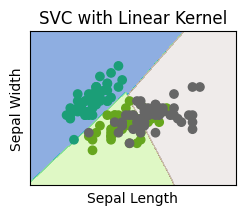

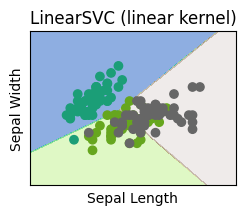

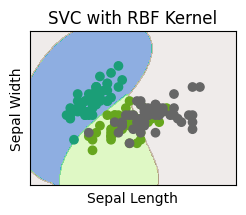

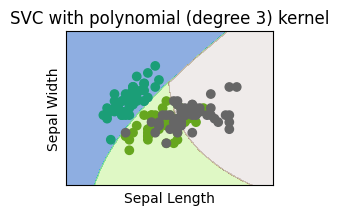

In [ ]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
  plt.figure()
  plt.subplot(2,2,i+1)
  plt.subplots_adjust(wspace=0.4,hspace=0.4)
  Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx,yy,Z,cmap= plt.cm.terrain, alpha= 0.5, linewidths=0)
  plt.scatter(X[:,0] , X[:,1], c=Y, cmap= plt.cm.Dark2)
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal Width")
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])

The optimization method used in `svm.LinearSVC` differs from the Sequential Minimal Optimization (SMO) algorithm, which is typically used in `svm.SVC`. Here's how they differ:

### Sequential Minimal Optimization (SMO) Algorithm (Used in `svm.SVC`):

1. **Approach:**
   - SMO decomposes the SVM optimization problem into smaller subproblems that are solved analytically or using numerical optimization techniques.
   - It iteratively optimizes pairs of Lagrange multipliers, corresponding to support vectors, to find the optimal hyperplane.

2. **Optimization Strategy:**
   - At each iteration, SMO selects two Lagrange multipliers and optimizes them while keeping others constant.
   - This process continues until convergence is reached, i.e., when the changes in Lagrange multipliers become sufficiently small.

3. **Performance:**
   - SMO is effective for solving SVM problems, particularly with non-linear kernels, but its performance may degrade with larger datasets due to its quadratic or cubic time complexity.

### Coordinate Descent Algorithm (Used in `svm.LinearSVC`):

1. **Approach:**
   - Coordinate descent optimizes the SVM's decision function coefficients (weights) one at a time while keeping others fixed.
   - It iterates over each feature dimension and updates the corresponding coefficient to minimize the cost function.

2. **Optimization Strategy:**
   - At each iteration, coordinate descent selects a feature dimension and optimizes the corresponding coefficient.
   - This process continues until convergence, with each dimension being updated sequentially.

3. **Performance:**
   - Coordinate descent is efficient and scalable, especially for linear SVMs and large-scale datasets, as it has linear time complexity with respect to the number of samples and features.

### Key Differences:

1. **Optimization Strategy:**
   - SMO optimizes pairs of Lagrange multipliers, while coordinate descent optimizes individual coefficients sequentially.
   
2. **Performance:**
   - SMO may suffer from performance degradation with larger datasets due to its quadratic or cubic time complexity.
   - Coordinate descent is more efficient and scalable, particularly for large-scale linear SVM problems.

In summary, while both methods aim to optimize the SVM's decision function to find the optimal hyperplane, they employ different optimization strategies and have distinct performance characteristics, making them suitable for different scenarios and problem sizes.

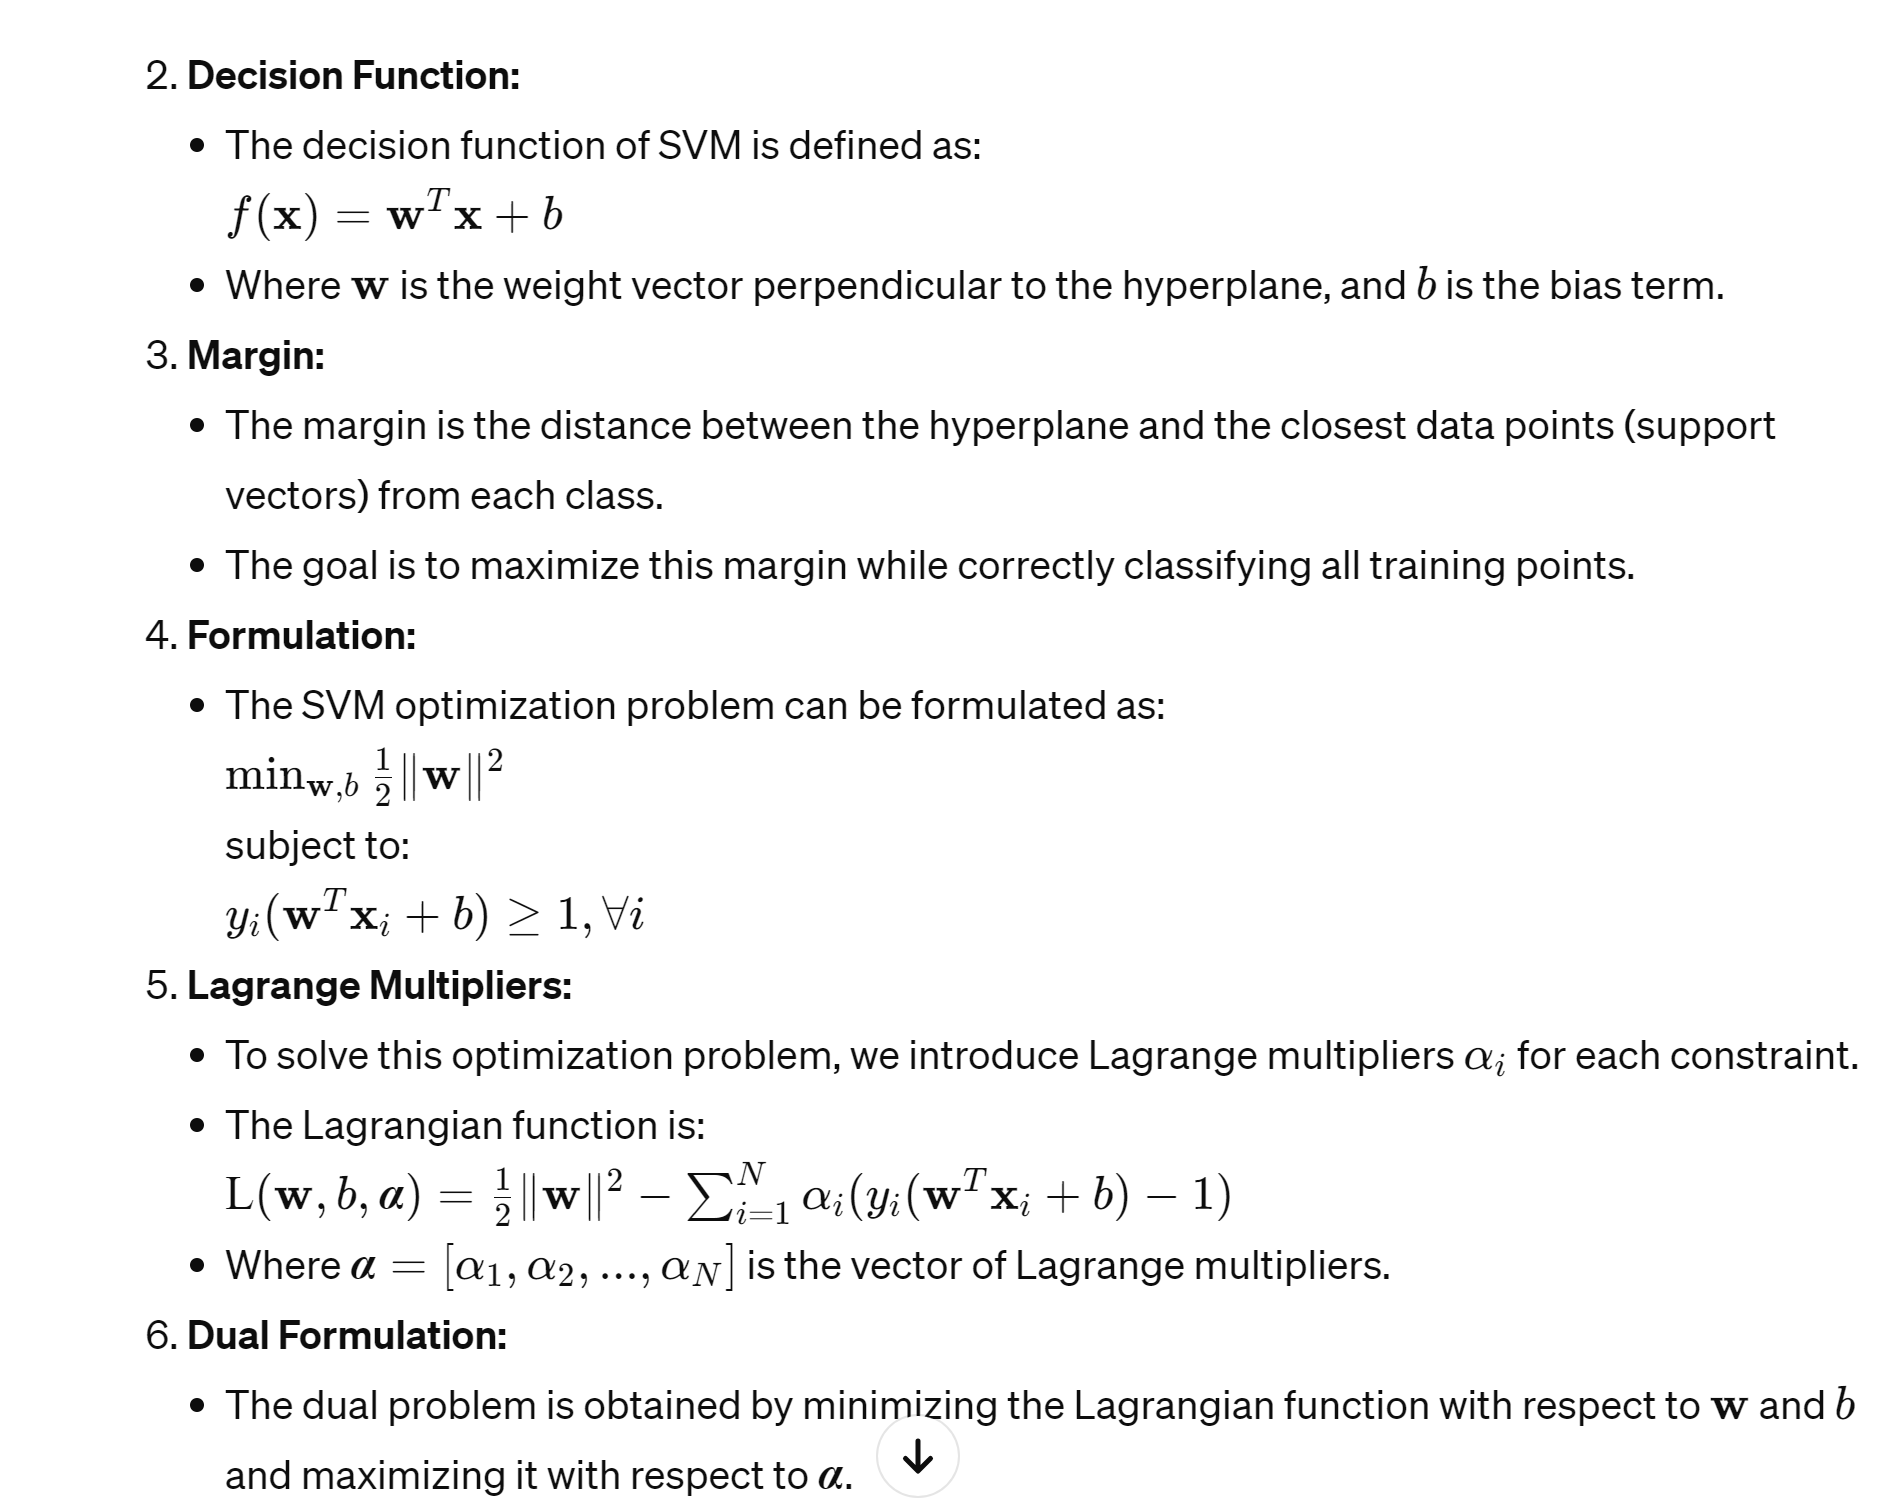